In [45]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv(r"C:\Users\Minahil Gillani\Downloads\JP\Video_Game_Information.csv")

In [48]:
df.head()

,Unnamed: 0,Title,Genre,Platform,ReleaseYear,NumPlayers,AvgRating
0,0,Super Mario Bros,Platformer,NES,1985,1,9.4
1,1,The Legend of Zelda,Action-Adventure,NES,1986,1,9.2
2,2,Minecraft,Sandbox,Multi-platform,2011,8,9.5
3,3,Tetris,Puzzle,Multi-platform,1984,1,8.5
4,4,Call of Duty: Modern Warfare,First-Person Shooter,Multi-platform,2007,16,8.9


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12 non-null     int64  
 1   Title        12 non-null     object 
 2   Genre        12 non-null     object 
 3   Platform     12 non-null     object 
 4   ReleaseYear  12 non-null     int64  
 5   NumPlayers   12 non-null     int64  
 6   AvgRating    12 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 800.0+ bytes


In [50]:
df.describe()

,Unnamed: 0,ReleaseYear,NumPlayers,AvgRating
count,12.000000,12.000000,12.000000,12.000000
mean,5.500000,2006.583333,17.750000,9.175000
std,3.605551,13.466850,28.142898,0.511904
min,0.000000,1984.000000,1.000000,8.400000
25%,2.750000,2001.750000,1.000000,8.750000
50%,5.500000,2012.000000,9.000000,9.300000
75%,8.250000,2016.250000,19.500000,9.625000
max,11.000000,2018.000000,100.000000,9.800000


In [51]:
titles_by_platform = df.groupby('Platform')['Title']

In [52]:
titles_by_platform = df.groupby('Platform')['Title'].count()
print(titles_by_platform)

Platform
Multi-platform    8
NES               2
PC                1
PlayStation       1
Name: Title, dtype: int64


In [53]:
total_games_by_platform = df['Platform'].value_counts()

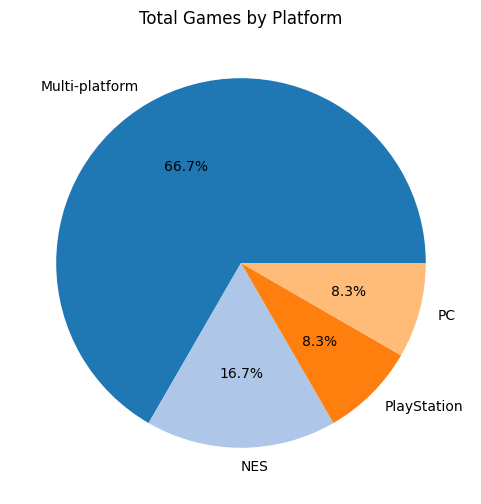

In [54]:
plt.figure(figsize=(6, 6))
plt.pie(total_games_by_platform, labels=total_games_by_platform.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Total Games by Platform')
plt.show()

In [55]:

xbox_titles = df[df['Platform'] == 'Xbox']['Title']
print(xbox_titles)

Series([], Name: Title, dtype: object)


In [56]:
ps_titles = df[df['Platform'] == 'PlayStation']['Title']
print(ps_titles)

7    God of War
Name: Title, dtype: object


In [57]:
switch_titles = df[df['Platform'] == 'Switch']['Title']
print(switch_titles)

Series([], Name: Title, dtype: object)


In [58]:
pc_titles = df[df['Platform'] == 'PC']['Title']
print(pc_titles)

8    League of Legends
Name: Title, dtype: object


In [59]:
nes_titles = df[df['Platform'] == 'NES']['Title']
print(nes_titles)

0       Super Mario Bros
1    The Legend of Zelda
Name: Title, dtype: object


In [60]:
mp_titles = df[df['Platform'] == 'Multi-platform']['Title']
print(mp_titles)

2                        Minecraft
3                           Tetris
4     Call of Duty: Modern Warfare
5         The Witcher 3: Wild Hunt
6                         Fortnite
9               Grand Theft Auto V
10                       Overwatch
11           Red Dead Redemption 2
Name: Title, dtype: object


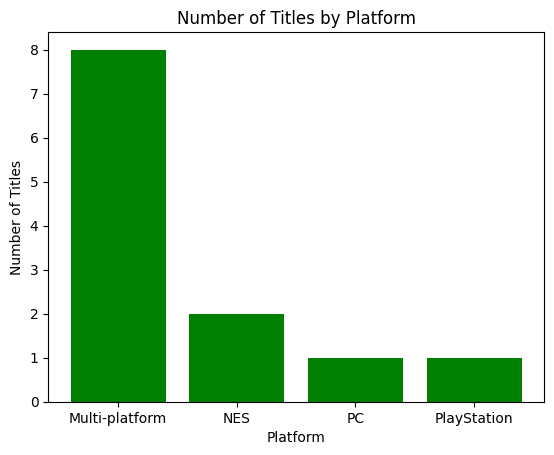

In [61]:
plt.bar(titles_by_platform.index, titles_by_platform.values, color='green')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Platform')
plt.show()

In [62]:
platform_avg_rating = df.groupby('Platform')['AvgRating'].mean()

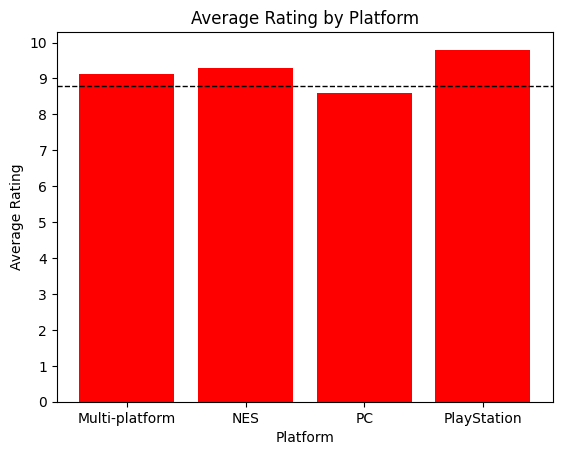

In [63]:
plt.bar(platform_avg_rating.index, platform_avg_rating.values, color='red')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.yticks(range(11))
plt.axhline(y=8.8, color='black', linestyle='--', linewidth=1)
plt.title('Average Rating by Platform')
plt.show()


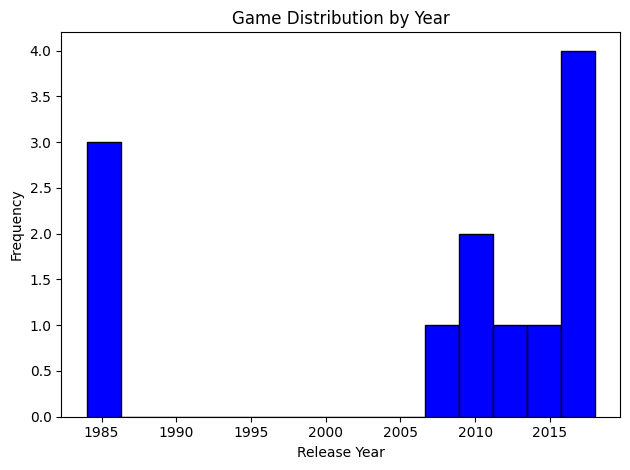

In [64]:
plt.hist(df['ReleaseYear'], bins=15, color='blue', edgecolor='black')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Game Distribution by Year")
plt.tight_layout()
plt.show()


In [65]:
total_games_by_genre = df['Genre'].value_counts()

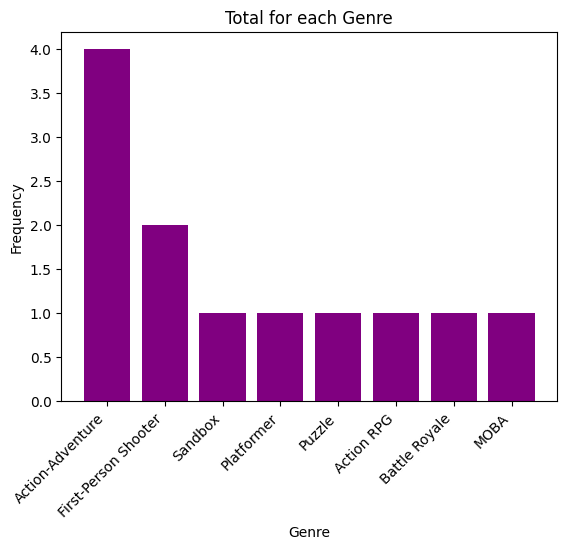

In [66]:
plt.bar(total_games_by_genre.index, total_games_by_genre.values, color='purple')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Total for each Genre')
plt.show()

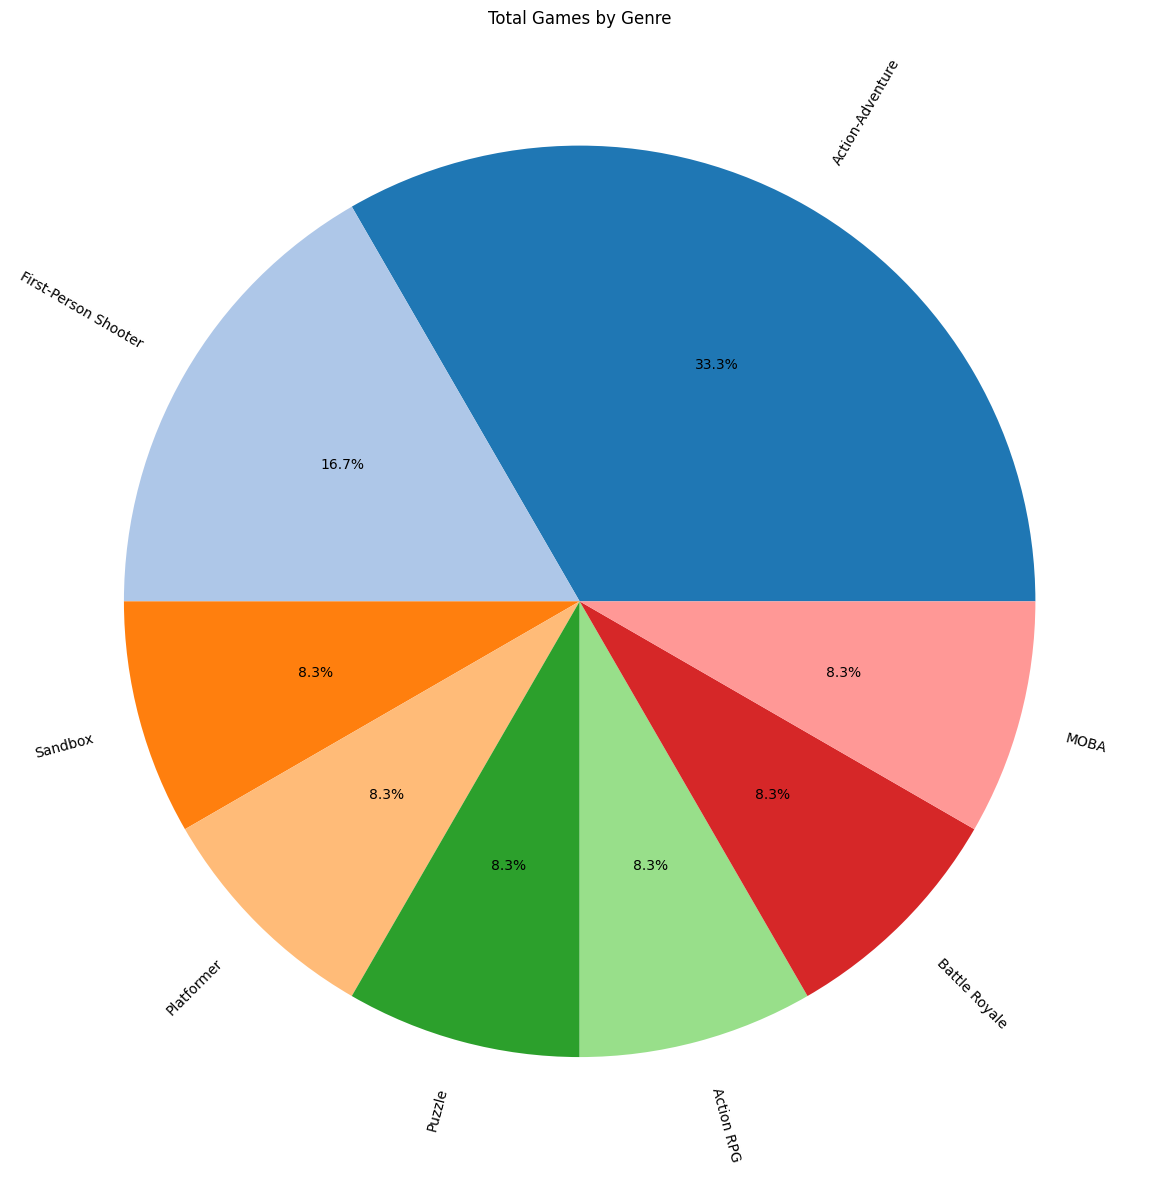

In [67]:
plt.figure(figsize=(12, 12))
plt.pie(total_games_by_genre, labels=total_games_by_genre.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors, rotatelabels=True, labeldistance=1.1)
plt.title('Total Games by Genre')
plt.tight_layout()
plt.show()

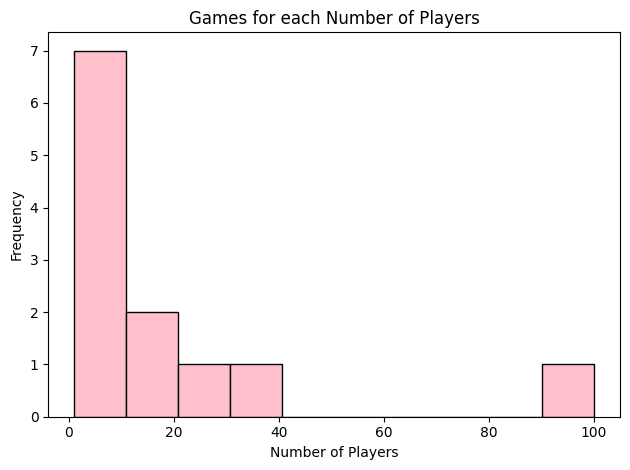

In [68]:
plt.hist(df['NumPlayers'], bins=10, color='pink', edgecolor='black')
plt.xlabel("Number of Players")
plt.xticks(minor=True)
plt.ylabel("Frequency")
plt.title("Games for each Number of Players")
plt.tight_layout()
plt.show()


In [69]:
single_player = df[df['NumPlayers'] == 1]

In [70]:
single_player.count()

Unnamed: 0     5
Title          5
Genre          5
Platform       5
ReleaseYear    5
NumPlayers     5
AvgRating      5
dtype: int64

In [71]:
single_player['Title']

0            Super Mario Bros
1         The Legend of Zelda
3                      Tetris
5    The Witcher 3: Wild Hunt
7                  God of War
Name: Title, dtype: object

In [72]:
single_players_platforms = single_player.groupby('Platform').size()

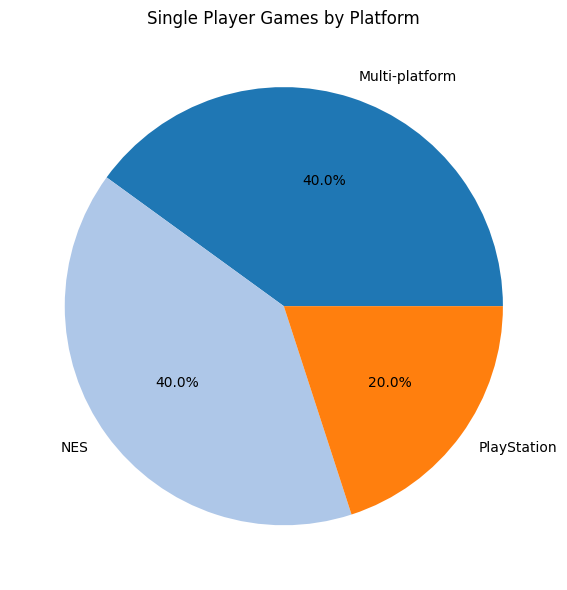

In [73]:
plt.figure(figsize=(6, 6))
plt.pie(single_players_platforms, labels=single_players_platforms.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Single Player Games by Platform')
plt.tight_layout()
plt.show()

In [74]:
multiplayer = df[df['NumPlayers'] != 1]

In [75]:
multiplayer.count()

Unnamed: 0     7
Title          7
Genre          7
Platform       7
ReleaseYear    7
NumPlayers     7
AvgRating      7
dtype: int64

In [76]:
multiplayer['Platform']

2     Multi-platform
4     Multi-platform
6     Multi-platform
8                 PC
9     Multi-platform
10    Multi-platform
11    Multi-platform
Name: Platform, dtype: object

In [77]:
multiplayer['Title']

2                        Minecraft
4     Call of Duty: Modern Warfare
6                         Fortnite
8                League of Legends
9               Grand Theft Auto V
10                       Overwatch
11           Red Dead Redemption 2
Name: Title, dtype: object

In [78]:
multiplayer_platforms = multiplayer.groupby('Platform').size()

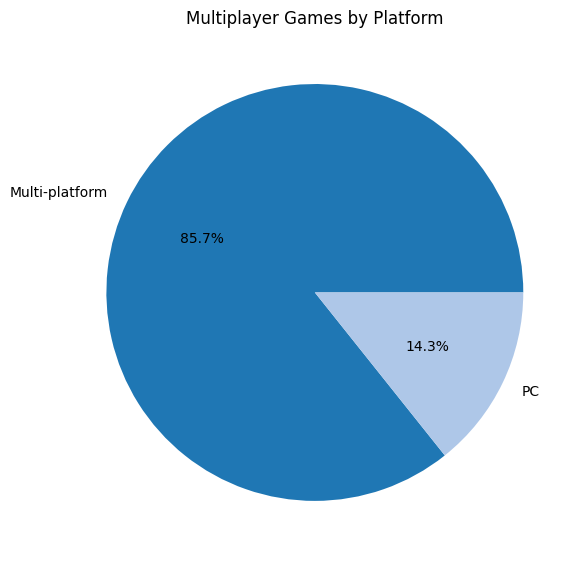

In [79]:
plt.figure(figsize=(6, 6))
plt.pie(multiplayer_platforms, labels=multiplayer_platforms.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Multiplayer Games by Platform')
plt.tight_layout()
plt.show()

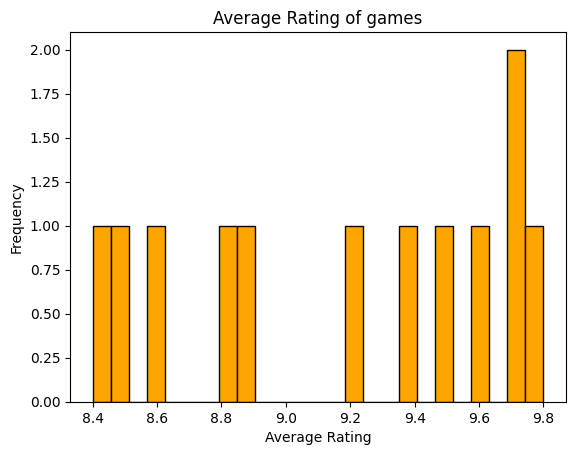

In [80]:
plt.hist(df['AvgRating'], bins=25, color='orange', edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Average Rating of games")

plt.show()

In [81]:
highly_rated_games = df[df['AvgRating'] >= 9.5]

In [82]:
highly_rated_games.count()

Unnamed: 0     5
Title          5
Genre          5
Platform       5
ReleaseYear    5
NumPlayers     5
AvgRating      5
dtype: int64

In [83]:
highly_rated_games['Title']

2                    Minecraft
5     The Witcher 3: Wild Hunt
7                   God of War
9           Grand Theft Auto V
11       Red Dead Redemption 2
Name: Title, dtype: object

In [84]:
highly_rated_games['ReleaseYear']

2     2011
5     2015
7     2018
9     2013
11    2018
Name: ReleaseYear, dtype: int64

In [85]:
highly_rated_games['Genre']

2              Sandbox
5           Action RPG
7     Action-Adventure
9     Action-Adventure
11    Action-Adventure
Name: Genre, dtype: object

In [86]:
highly_rated_game_genre = highly_rated_games['Genre'].value_counts()


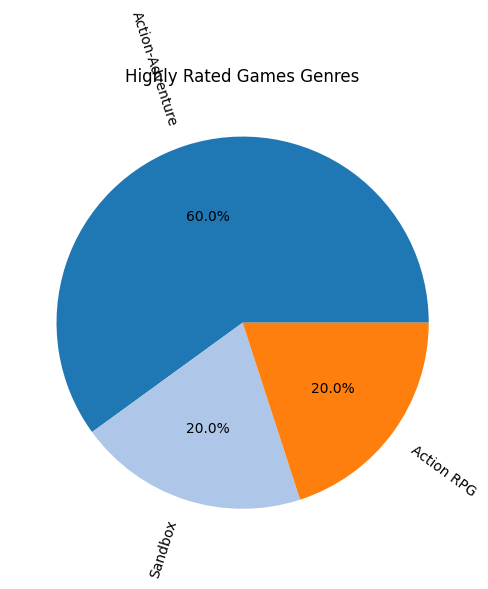

In [87]:
plt.figure(figsize=(6, 6))
plt.pie(highly_rated_game_genre, labels=highly_rated_game_genre.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors, rotatelabels=True)
plt.title('Highly Rated Games Genres')
plt.tight_layout()
plt.show()